# Item_based Collaborative Filtering Recommender
## (基于物品的协同过滤推荐系统)
#### ----Music Recommender (data from Youtube)

In [1]:
import pandas as pd
import numpy as np
import time
import sqlite3

In [2]:
data_home = './'

## 一 数据的加载及筛选
reading user, song, play_count data

In [7]:
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt', 
                              sep='\t', header=None, 
                              names=['user','song','play_count'])

In [5]:
triplet_dataset.shape

(48373586, 3)

In [6]:
triplet_dataset.head(n=10)

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1


### 1 Play count for each user (每个用户的播放总数)

In [54]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        user = line.split('\t')[0]
        play_count = int(line.split('\t')[2])
        # user in dict
        if user in output_dict:
            play_count +=output_dict[user]
            output_dict.update({user:play_count}) 
        # user not in dict
        output_dict.update({user:play_count})
output_list = [{'user':k,'play_count':v} for k,v in output_dict.items()]
# list to df
play_count_df = pd.DataFrame(output_list)
# ASC sort by play_count
play_count_df = play_count_df.sort_values(by = 'play_count', ascending = False)

In [ ]:
# save as csv, for later use
play_count_df.to_csv(path_or_buf='user_playcount_df.csv', index = False)

### 2 Play count for each song (每首歌的播放总数)

In [10]:
output_dict = {}
with open(data_home+'train_triplets.txt') as f:
    for line_number, line in enumerate(f):
        song = line.split('\t')[1]
        play_count = int(line.split('\t')[2])
        if song in output_dict:
            play_count +=output_dict[song]
            output_dict.update({song:play_count})
        output_dict.update({song:play_count})
output_list = [{'song':k,'play_count':v} for k,v in output_dict.items()]
song_count_df = pd.DataFrame(output_list)
song_count_df = song_count_df.sort_values(by = 'play_count', ascending = False)

In [ ]:
song_count_df.to_csv(path_or_buf='song_playcount_df.csv', index = False)

### 3 reading user_playcount_df, song_count_df （读取排序好的数据）


In [3]:
play_count_df = pd.read_csv(filepath_or_buffer='user_playcount_df.csv')
play_count_df.head(n =10)

,play_count,user
0,13132,093cb74eb3c517c5179ae24caf0ebec51b24d2a2
1,9884,119b7c88d58d0c6eb051365c103da5caf817bea6
2,8210,3fa44653315697f42410a30cb766a4eb102080bb
3,7015,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b
4,6494,d7d2d888ae04d16e994d6964214a1de81392ee04
5,6472,4ae01afa8f2430ea0704d502bc7b57fb52164882
6,6150,b7c24f770be6b802805ac0e2106624a517643c17
7,5656,113255a012b2affeab62607563d03fbdf31b08e7
8,5620,6d625c6557df84b60d90426c0116138b617b9449
9,5602,99ac3d883681e21ea68071019dba828ce76fe94d


In [4]:
song_count_df = pd.read_csv(filepath_or_buffer='song_playcount_df.csv')
song_count_df.head(10)

,play_count,song
0,726885,SOBONKR12A58A7A7E0
1,648239,SOAUWYT12A81C206F1
2,527893,SOSXLTC12AF72A7F54
3,425463,SOFRQTD12A81C233C0
4,389880,SOEGIYH12A6D4FC0E3
5,356533,SOAXGDH12A8C13F8A1
6,292642,SONYKOW12AB01849C9
7,274627,SOPUCYA12A8C13A694
8,268353,SOUFTBI12AB0183F65
9,244730,SOVDSJC12A58A7A271


In [7]:
song_count_df.tail(100)

,play_count,song
384446,1,SOLISVT12AB018A3DA
384447,1,SOGUIBA12A81C22838
384448,1,SOUXWZU12A6D4F5C1A
384449,1,SODYGBQ12A6D4F5C17
384450,1,SOEFSRN12A6D4F7B08
384451,1,SOEHFVN12AB017F8A3
384452,1,SOBGACN12A8C13E14D
384453,1,SOGQOPP12AB0182202
384454,1,SOBVKJJ12A6D4F8C85
384455,1,SOKDDNH12AB017EEA9


### 4 取出数据的一部分子集(可代表大部分样本)作为实验数据


In [5]:
# 前20w用户播放量占总播放量的比例  
total_play_count = sum(song_count_df.play_count)
print ((float(play_count_df.head(n=150000).play_count.sum())/total_play_count)*100)
play_count_subset = play_count_df.head(n=150000)

51.1606033168


In [6]:
# 前3w首歌播放量占总播放量的比例 
print((float(song_count_df.head(n=30000).play_count.sum())/total_play_count)*100)
song_count_subset = song_count_df.head(n=30000)

78.3931536665


从以上数据中可以看出，少部分用户播放量占总体大部分，少部分歌曲被播放的次数占总体大部分。

In [7]:
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)

#### 过滤其他数据

In [11]:
triplet_dataset = pd.read_csv(filepath_or_buffer=data_home+'train_triplets.txt',sep='\t', 
                              header=None, names=['user','song','play_count'])
triplet_dataset_sub = triplet_dataset[triplet_dataset.user.isin(user_subset) ]
del(triplet_dataset)
triplet_dataset_sub_song = triplet_dataset_sub[triplet_dataset_sub.song.isin(song_subset)]
del(triplet_dataset_sub)

In [12]:
triplet_dataset_sub_song.to_csv(path_or_buf=data_home+'triplet_dataset_sub_song.csv', index=False)

In [13]:
triplet_dataset_sub_song.shape

(14170027, 3)

In [14]:
triplet_dataset_sub_song.head(n=10)

,user,song,play_count
498,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
499,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
500,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
501,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
502,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7
503,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBONKR12A58A7A7E0,26
504,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBZZDU12A6310D8A3,7
505,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOCAHRT12A8C13A1A4,5
506,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODASIJ12A6D4F5D89,1
507,d6589314c0a9bcbca4fee0c93b14bc402363afea,SODEAWL12AB0187032,8


### 5 从数据库文件中读取歌曲详细信息数据
.db文件需要稍微处理下 转换成csv


In [15]:
conn = sqlite3.connect(data_home + 'track_metadata.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('songs',)]

In [21]:
track_metadata_df = pd.read_sql(con=conn, sql='SELECT * FROM songs')                                      
track_metadata_df_sub = track_metadata_df[track_metadata_df.song_id.isin(song_subset)]                                          

In [19]:
track_metadata_df_sub.to_csv(path_or_buf=data_home+'track_metadata_df_sub.csv', index=False)

In [20]:
track_metadata_df_sub.shape

(30447, 14)

In [4]:
triplet_dataset_sub_song = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song.csv',encoding = "ISO-8859-1")
track_metadata_df_sub = pd.read_csv(filepath_or_buffer=data_home+'track_metadata_df_sub.csv',encoding = "ISO-8859-1")

In [5]:
triplet_dataset_sub_song.head()

,user,song,play_count
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7


In [6]:
track_metadata_df_sub.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMGCB128E079651D,Get Along (Feat: Pace Won) (Instrumental),SOHNWIM12A67ADF7D9,Charango,ARU3C671187FB3F71B,067102ea-9519-4622-9077-57ca4164cfbb,Morcheeba,227.47383,0.819087,0.533117,2002,185967,-1,0
1,TRMMGTX128F92FB4D9,Viejo,SOECFIW12A8C144546,Caraluna,ARPAAPH1187FB3601B,f69d655c-ffd6-4bee-8c2a-3086b2be2fc6,Bacilos,307.51302,0.595554,0.400705,0,6825058,-1,0
2,TRMMGDP128F933E59A,I Say A Little Prayer,SOGWEOB12AB018A4D0,The Legendary Hi Records Albums_ Volume 3: Ful...,ARNNRN31187B9AE7B7,fb7272ba-f130-4f0a-934d-6eeea4c18c9a,Al Green,133.58975,0.779490,0.599210,1978,5211723,-1,11898
3,TRMMHBF12903CF6E59,At the Ball_ That's All,SOJGCRL12A8C144187,Best of Laurel & Hardy - The Lonesome Pine,AR1FEUF1187B9AF3E3,4a8ae4fd-ad6f-4912-851f-093f12ee3572,Laurel & Hardy,123.71546,0.438709,0.307120,0,8645877,-1,0
4,TRMMHKG12903CDB1B5,Black Gold,SOHNFBA12AB018CD1D,Total Life Forever,ARVXV1J1187FB5BF88,6a65d878-fcd0-42cf-aff9-ca1d636a8bcc,Foals,386.32444,0.842578,0.514523,2010,9007438,-1,0


## 二 数据清洗

### 1 删除与推荐关系不大的以及重复的数据

In [7]:
del(track_metadata_df_sub['track_id'])
del(track_metadata_df_sub['artist_mbid'])

In [8]:
triplet_dataset_sub_song_merged = pd.merge(triplet_dataset_sub_song, track_metadata_df_sub, how='left', left_on='song', right_on='song_id')
triplet_dataset_sub_song_merged.rename(columns={'play_count':'listen_count'},inplace=True)
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,song_id,release,artist_id,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,SOADQPP12A67020C82,Tribute To Jake Hess,ARDFZE61187FB45994,Jake Hess,199.26159,0.374553,0.327544,2004,142275,-1,0
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,SOAFTRR12AF72A8D4D,Discovery,ARF8HTQ1187B9AE693,Daft Punk,223.60771,0.902841,1.021256,2007,485119,-1,0
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,SOANQFY12AB0183239,Uprising,ARR3ONV1187B9A2F59,Muse,304.84853,0.929030,0.750427,0,6024257,-1,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,SOAYATB12A6701FD50,Home,AR97V5X1187FB4AE98,Deep Blue Something,257.22730,0.655889,0.409729,1993,163047,-1,0
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),SOBOAFP12A8C131F36,We Sing. We Dance. We Steal Things.,ARML3X41187FB35F2E,Jason Mraz & Colbie Caillat,189.62240,0.842972,0.770117,0,2638597,-1,0


In [9]:
del(triplet_dataset_sub_song_merged['song_id'])
del(triplet_dataset_sub_song_merged['artist_id'])
del(triplet_dataset_sub_song_merged['duration'])
del(triplet_dataset_sub_song_merged['artist_familiarity'])
del(triplet_dataset_sub_song_merged['artist_hotttnesss'])
del(triplet_dataset_sub_song_merged['track_7digitalid'])
del(triplet_dataset_sub_song_merged['shs_perf'])
del(triplet_dataset_sub_song_merged['shs_work'])

In [13]:
triplet_dataset_sub_song_merged.head()

,user,song,listen_count,title,release,artist_name,year
0,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOADQPP12A67020C82,12,You And Me Jesus,Tribute To Jake Hess,Jake Hess,2004
1,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAFTRR12AF72A8D4D,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
2,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOANQFY12AB0183239,1,Uprising,Uprising,Muse,0
3,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOAYATB12A6701FD50,1,Breakfast At Tiffany's,Home,Deep Blue Something,1993
4,d6589314c0a9bcbca4fee0c93b14bc402363afea,SOBOAFP12A8C131F36,7,Lucky (Album Version),We Sing. We Dance. We Steal Things.,Jason Mraz & Colbie Caillat,0


In [14]:
triplet_dataset_sub_song_merged.to_csv(path_or_buf=data_home+'triplet_dataset_sub_song_merged.csv', index=False)

## 三 数据探索
有了这些数据之后，我们可能会想给用户展示最受欢迎的歌手，歌曲，专辑有哪些。


In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [17]:
triplet_dataset_sub_song_merged = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song_merged.csv')

### 1 最受欢迎的Top10歌曲
这里通过统计每首歌的播放量，作为衡量标准。

In [18]:
popular_songs = triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()
# 或者 popular_songs = triplet_dataset_sub_song_merged.groupby('title')['listen_count'].sum().reset_index()
popular_songs_top_10 = popular_songs.sort_values('listen_count', ascending=False).head(n=10)

In [19]:
popular_songs_top_10.head()

,title,listen_count
27353,You're The One,328896
25106,Undo,258437
18662,Revelry,229079
19608,Sehr kosmisch,164356
9935,Horn Concerto No. 4 in E flat K495: II. Romanc...,163878


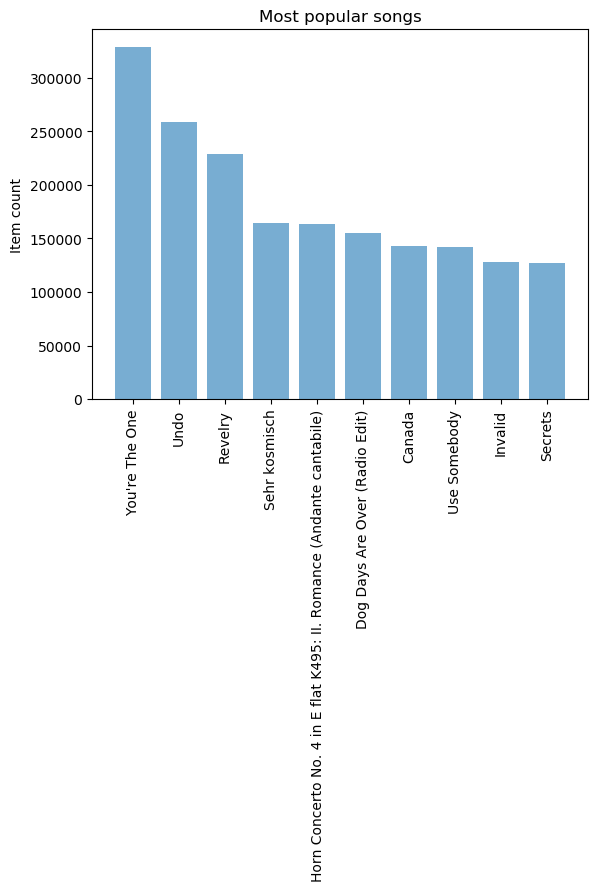

In [20]:
titles = list(popular_songs_top_10['title'])
x = np.arange(len(titles))
height = list(popular_songs_top_10['listen_count'])

plt.bar(x, height, align='center', alpha=0.6)
plt.xticks(x, titles, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular songs')

plt.show()

### 2 最受欢迎的Top10歌手

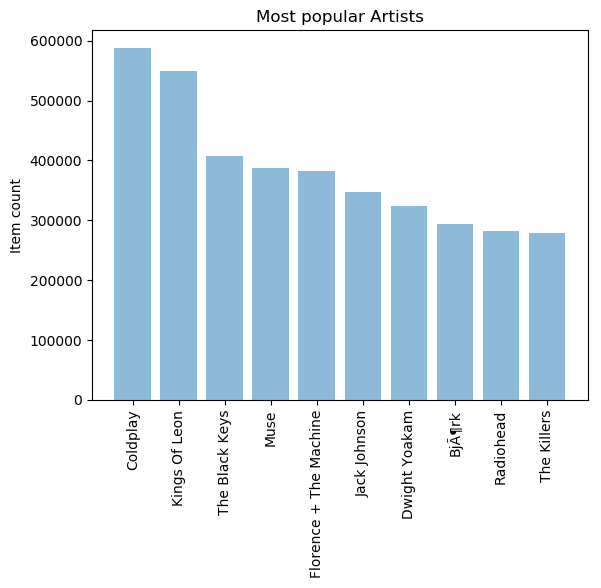

In [21]:
popular_artist = triplet_dataset_sub_song_merged[['artist_name','listen_count']].groupby('artist_name').sum().reset_index()
popular_artist_top_10 = popular_artist.sort_values('listen_count', ascending=False).head(n=10)

artist_names = (list(popular_artist_top_10['artist_name']))
x = np.arange(len(artist_names))
height = list(popular_artist_top_10['listen_count'])
 
plt.bar(x, height, align='center', alpha=0.5)
plt.xticks(x, artist_names, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Artists')
 
plt.show()

### 3 最受欢迎的Top10专辑

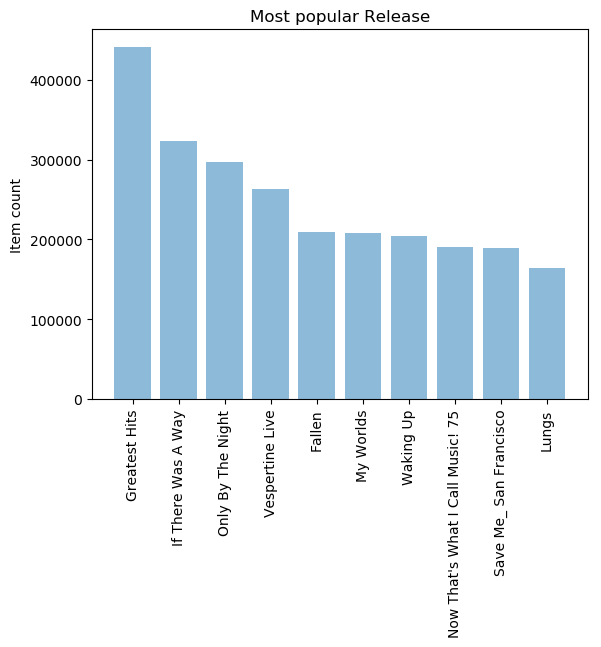

In [22]:
popular_release = triplet_dataset_sub_song_merged[['release','listen_count']].groupby('release').sum().reset_index()
popular_release_top_10 = popular_release.sort_values('listen_count', ascending=False).head(n=10)

releases = (list(popular_release_top_10['release']))
x = np.arange(len(releases))
height = list(popular_release_top_10['listen_count'])
 
plt.bar(x, height, align='center', alpha=0.5)
plt.xticks(x, releases, rotation='vertical')
plt.ylabel('Item count')
plt.title('Most popular Release')
 
plt.show()

### 4 播放量与用户的关系

In [23]:
user_song_count_distribution = triplet_dataset_sub_song_merged[['user','title']].groupby('user').count().reset_index().sort_values(
by='title',ascending = False)
user_song_count_distribution.head()

,user,title
45748,4e73d9e058d2b1f2dba9c1fe4a8f416f9f58364f,1240
82138,8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,1218
113115,c1255748c06ee3f6440c51c439446886c7807095,1214
10099,119b7c88d58d0c6eb051365c103da5caf817bea6,1184
88297,96f7b4f800cafef33eae71a6bc44f7139f63cd7a,1094


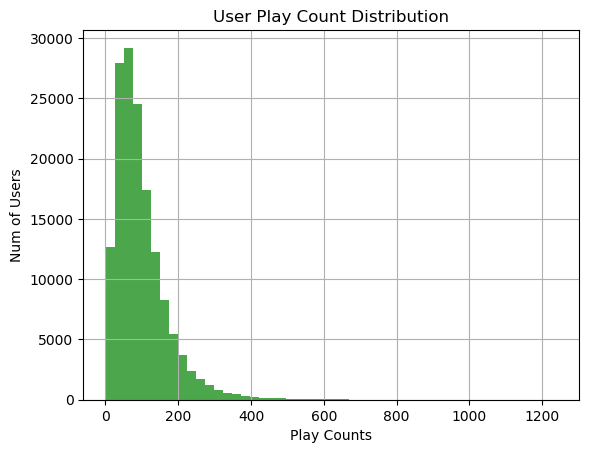

In [32]:
x = user_song_count_distribution.title
n, bins, patches = plt.hist(x, 50, facecolor='green', alpha=0.7)
plt.xlabel('Play Counts')
plt.ylabel('Num of Users')
plt.title('User Play Count Distribution')
plt.grid(True)
plt.show()


从图中可以看出，播放量为100左右的人数是最多的。

## 四 进行推荐

### 加载数据

In [8]:
triplet_dataset_sub_song_merged = pd.read_csv(filepath_or_buffer=data_home+'triplet_dataset_sub_song_merged.csv')

### 1 协同过滤方法进行个性化推荐
这里采用了基于商品的协同过滤方法进行推荐系统模型的构建，简单来说就是根据用户行为，通过计算商品与商品的相似度来给指定用户进行推荐 。

之所以采用基于商品的协同过滤而不用基于用户的协同过滤，是因为：
用户容易善变，他们的喜好易改变；而商品不易变，可以事先离线计算出商品间的相似度，并保留此计算结果。这样计算效率就能得到提高。
而且商品通常比用户少，计算量就相对较少。


In [17]:
# 选择一小部分数据进行实验
song_count_subset = song_count_df.head(n=5000)
user_subset = list(play_count_subset.user)
song_subset = list(song_count_subset.song)
triplet_dataset_sub_song_merged_sub = triplet_dataset_sub_song_merged[triplet_dataset_sub_song_merged.song.isin(song_subset)]

In [18]:
from sklearn.model_selection import train_test_split
import Recommenders as Recommenders

train_data, test_data = train_test_split(triplet_dataset_sub_song_merged_sub, test_size = 0.30, random_state=0)

In [63]:
train_data.head()

,user,song,listen_count,title,release,artist_name,year
1248632,f02af078448987c1f41d32bf92860edc731a8d01,SOJTIXE12AB018C99E,1,Sinister Kid,Brothers,The Black Keys,2010
7775865,a165f6d52920f77433932763ad0b162e9fd6f3f2,SONAKBL12AB0183CF5,3,Stupid Girl,Garbage,Garbage,1995
3117870,47d62d936875573f16c2d2ff3aba23fcbb1b9f38,SOPHQPE12AB0183798,1,Touched By The Sun,30 Best Trance Anthems Best Ever,Envio,2003
9988303,1a1ad6b2adc4573e8ea272660e8748a5b244830f,SOUSMXX12AB0185C24,116,OMG,OMG - The Remixes,Usher featuring will.i.am,2010
1974093,55834d99aa5e4dc334b3244b053bfe7360f072e4,SOTVLQY12A58A798C2,2,Home,Up From Below,Edward Sharpe & The Magnetic Zeros,2009


In [19]:
# 实例化推荐模型对象
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user', 'title')
# 随机指定用户
user_id = list(train_data.user)[7]
# 获取指定用户听过的所有歌
user_items = is_model.get_user_items(user_id)

In [16]:
# 使用个性化模型对用户进行歌曲推荐
is_model.recommend(user_id)

No. of unique songs for the user: 14
No. of unique songs in the training set: 1004
Non zero values in cooccurence_matrix :14010


,user_id,song,score,rank
0,9292a0400ebe3969c21af8ce049274bf8c00cfc0,Songs Of The Season,0.081720,1
1,9292a0400ebe3969c21af8ce049274bf8c00cfc0,Such Great Heights,0.062326,2
2,9292a0400ebe3969c21af8ce049274bf8c00cfc0,The District Sleeps Alone Tonight (Album),0.059663,3
3,9292a0400ebe3969c21af8ce049274bf8c00cfc0,A-Punk (Album),0.055966,4
4,9292a0400ebe3969c21af8ce049274bf8c00cfc0,Oxford Comma (Album),0.055926,5
5,9292a0400ebe3969c21af8ce049274bf8c00cfc0,Gimme Sympathy,0.055116,6
6,9292a0400ebe3969c21af8ce049274bf8c00cfc0,Cousins,0.050705,7
7,9292a0400ebe3969c21af8ce049274bf8c00cfc0,Gold Guns Girls,0.048389,8
8,9292a0400ebe3969c21af8ce049274bf8c00cfc0,The Kids Dont Stand A Chance (Album),0.047974,9
9,9292a0400ebe3969c21af8ce049274bf8c00cfc0,Cape Cod Kwassa Kwassa (Album),0.046401,10


In [21]:
# 使用个性化模型对用户进行歌曲推荐
is_model.recommend(user_id)

No. of unique songs for the user: 107
No. of unique songs in the training set: 4894
Non zero values in cooccurence_matrix :494650


,user_id,song,score,rank
0,fcce3a887a002eadcc2c90805c9be54cd4add2c9,Fast As I Can,0.096455,1
1,fcce3a887a002eadcc2c90805c9be54cd4add2c9,The Prize,0.092351,2
2,fcce3a887a002eadcc2c90805c9be54cd4add2c9,From The Station,0.091144,3
3,fcce3a887a002eadcc2c90805c9be54cd4add2c9,Daisy And Prudence,0.085588,4
4,fcce3a887a002eadcc2c90805c9be54cd4add2c9,Hands Up,0.085574,5
5,fcce3a887a002eadcc2c90805c9be54cd4add2c9,Rhode Island Is Famous For You,0.085070,6
6,fcce3a887a002eadcc2c90805c9be54cd4add2c9,You're A Cad,0.082599,7
7,fcce3a887a002eadcc2c90805c9be54cd4add2c9,Songs Of The Season,0.082401,8
8,fcce3a887a002eadcc2c90805c9be54cd4add2c9,Mia,0.080938,9
9,fcce3a887a002eadcc2c90805c9be54cd4add2c9,Sour Cherry,0.077127,10


### 2 进行排行榜推荐（热门歌曲推荐）
此方法是解决协同过滤冷启动问题的方法之一。

要做此推荐就要对每首歌进行评分，这里以每首歌被不同用户点击的数量作为评估分数，再对此进行排序，取出点击量最高的前10首。

与上面不同，triplet_dataset_sub_song_merged[['title','listen_count']].groupby('title').sum().reset_index()，是以每首歌的总播放量作为评估标准；
triplet_dataset_sub_song_merged.groupby([item_id]).agg({user_id: 'count'}).reset_index(),是以每首歌被不同用户的点击量作为评估标准。

In [22]:
def create_popularity_recommendation(data, user_id, item_id):
    #Get a count of user_ids for each unique song as recommendation score
    data_grouped = data.groupby([item_id]).agg({user_id: 'count'}).reset_index()
    data_grouped.rename(columns = {user_id: 'score'},inplace=True)
    
    #Sort the songs based upon recommendation score
    data_sort = data_grouped.sort_values('score', ascending = False)
    
    #Generate a recommendation rank based upon score
    data_sort['Rank'] = data_sort['score'].rank(ascending=False, method='first')
        
    #Get the top 10 recommendations
    popularity_recommendations = data_sort[:10]
    return popularity_recommendations

In [23]:
recommendations = create_popularity_recommendation(triplet_dataset_sub_song_merged,'user','title')

In [24]:
recommendations

,title,score,Rank
25252,Use Somebody,34726,1.0
27013,Yellow,29149,2.0
19608,Sehr kosmisch,26648,3.0
5789,Dog Days Are Over (Radio Edit),24866,4.0
27353,You're The One,22749,5.0
13922,Love Story,21526,6.0
19570,Secrets,21400,7.0
20788,Somebody To Love,21321,8.0
25106,Undo,21153,9.0
18662,Revelry,21144,10.0
